# Population Dynamics Under Similar Birth/Death Rate

The parameters $b_1$, $d_1$ and $b_2$, $d_2$ are purposedly set to be slightly different ($b_1=1.01b_2$, $d_1=1.01d_2$), so as to make sure that these solutions are robust to small changes of the birth/death rates.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from aadm.sode import RungeKutta4

In [6]:
u = 3.4e-05
s = 0.4/100
d = lambda j: (1-s)**(j+1)/2
b = lambda j: 1-d(j)
b1, d1 = b(0), d(0)
b2, d2 = b(1), d(1)
nu = b1*u
k = 1e7

In [12]:
u = 3.4e-05
b1, d1 = 3.25e-2, 1e-3
b2, d2 = 3.25e-2*5, 1e-3*5
nu = b1*u
k = 1e7

In [7]:
def rhs_cc_no_drug(x, t):
    N1, N2 = x
    rhs1 = b1*(1 - (N1+N2)/k)*N1 - (d1 + nu)*N1 + D*np.random.normal(0,1)
    rhs2 = b2*(1 - (N1+N2)/k)*N2 + nu*N1 - d2*N2 + D*np.random.normal(0,1)
    return np.array([rhs1,rhs2])

def rhs_cc_no_drug_logscale(x, t):
    x1, x2 = x
    N1, N2 = np.exp(x1), np.exp(x2)
    rhs1 = b1*(1 - (N1+N2)/k)*N1 - (d1 + nu)*N1
    rhs2 = b2*(1 - (N1+N2)/k)*N2 + nu*N1 - d2*N2
    return np.array([rhs1,rhs2])

def solve(p0):
    rest = np.arange(0, 5000, 1)
    solver = RungeKutta4(rhs_cc_no_drug)
    init_cond = np.array([p0, 1-p0])
    solver.set_initial_conditions(init_cond)
    resy, rest = solver.solve(rest)
    N_1, N_2 = resy.T
    return N_1, N_2

def fixed_points(b1, d1, b2, d2, n, k):
    x0_star = k*(b2-d2)/b2
    x1_star = k*(b1-d1-n)*(-b2*d1+b1*d2-b2*n)/b1/(-b2*d1+b1*d2+b1*n-b2*n)
    x2_star = k*(b1-d1-n)*n/(-b2*d1+b1*d2+b1*n-b2*n)
    return (0,0), (0,x0_star), (x1_star,x2_star)

def Jacobian(x1, x2, b1, d1, b2, d2, n, k):
    a = -d1-n-b1*x1/k+b1*(1-(x1+x2)/k)
    b = -b1*x1/k
    c = n-b2*x2/k
    d = -d2-b2*x2/k+b2*(1-(x1+x2)/k)
    return np.array([[a,b], [c,d]])

# Sensitivity to Initial Condition

The long-term behavior of the populations are sensitive to the initial condition $p_0$, which is the proportion of sensitive cells at $t=0$.

100%|##########| 4999/4999 [00:00<00:00, 24603.18it/s]


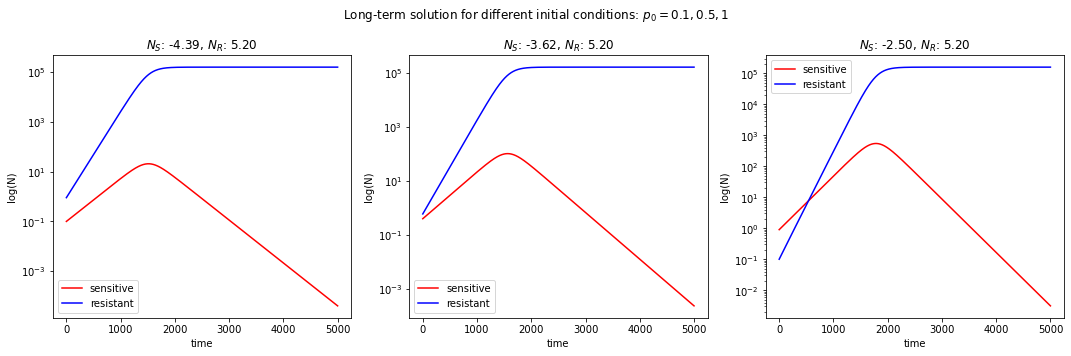

In [8]:
D = 0

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

N_1, N_2 = solve(0.1)
ax1.plot(N_1, 'r', label='sensitive')
ax1.plot(N_2, 'b', label='resistant')
ax1.set_xlabel('time'); ax1.set_ylabel('log(N)'); ax1.legend(); ax1.set_yscale('log')
ax1.set_title('$N_S$: {:.2f}, $N_R$: {:.2f}'.format(np.log10(N_1[-1]), np.log10(N_2[-1])))

N_1, N_2 = solve(0.4)
ax2.plot(N_1, 'r', label='sensitive')
ax2.plot(N_2, 'b', label='resistant')
ax2.set_xlabel('time'); ax2.set_ylabel('log(N)'); ax2.legend(); ax2.set_yscale('log')
ax2.set_title('$N_S$: {:.2f}, $N_R$: {:.2f}'.format(np.log10(N_1[-1]), np.log10(N_2[-1])))

N_1, N_2 = solve(0.9)
ax3.plot(N_1, 'r', label='sensitive')
ax3.plot(N_2, 'b', label='resistant')
ax3.set_xlabel('time'); ax3.set_ylabel('log(N)'); ax3.legend(); ax3.set_yscale('log')
ax3.set_title('$N_S$: {:.2f}, $N_R$: {:.2f}'.format(np.log10(N_1[-1]), np.log10(N_2[-1])))

plt.suptitle('Long-term solution for different initial conditions: $p_0=0.1,0.5,1$')
plt.tight_layout()
plt.savefig('init.png', dpi=300)

# Sensitivity to Perturbations

The long-term behavior of the populations are sensitive to small perturbations (Gaussian noise with $D\approx O(10^{-2})$).

100%|##########| 4999/4999 [00:00<00:00, 24662.97it/s]


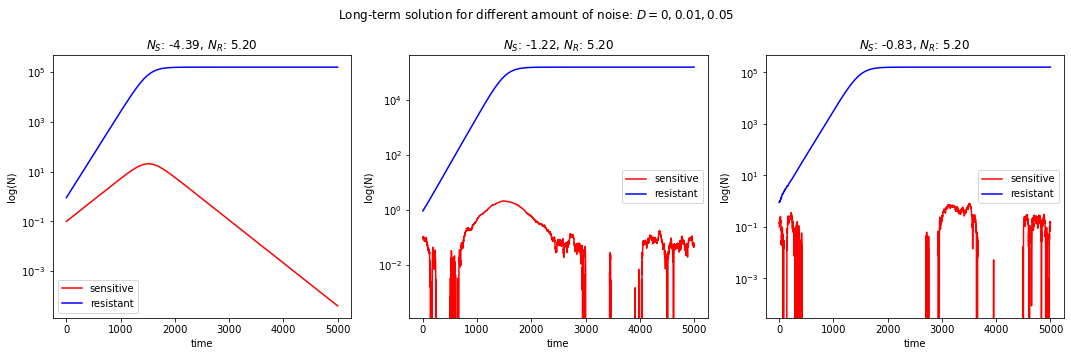

In [9]:
from aadm.sode import RungeKutta4

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

D = 0
N_1, N_2 = solve(0.1)
ax1.plot(N_1, 'r', label='sensitive')
ax1.plot(N_2, 'b', label='resistant')
ax1.set_xlabel('time'); ax1.set_ylabel('log(N)'); ax1.legend(); ax1.set_yscale('log')
ax1.set_title('$N_S$: {:.2f}, $N_R$: {:.2f}'.format(np.log10(N_1[-1]), np.log10(N_2[-1])))

D = 0.01
N_1, N_2 = solve(0.1)
ax2.plot(N_1, 'r', label='sensitive')
ax2.plot(N_2, 'b', label='resistant')
ax2.set_xlabel('time'); ax2.set_ylabel('log(N)'); ax2.legend(); ax2.set_yscale('log')
ax2.set_title('$N_S$: {:.2f}, $N_R$: {:.2f}'.format(np.log10(N_1[-1]), np.log10(N_2[-1])))

D = 0.05
N_1, N_2 = solve(0.1)
ax3.plot(N_1, 'r', label='sensitive')
ax3.plot(N_2, 'b', label='resistant')
ax3.set_xlabel('time'); ax3.set_ylabel('log(N)'); ax3.legend(); ax3.set_yscale('log')
ax3.set_title('$N_S$: {:.2f}, $N_R$: {:.2f}'.format(np.log10(N_1[-1]), np.log10(N_2[-1])))

plt.suptitle('Long-term solution for different amount of noise: $D=0,0.01,0.05$')
plt.tight_layout()
plt.savefig('perturbation.png', dpi=300)

# Explanation for the Sensitivity

Using Mathematica, we can solve for the fixed points and the Jacobian.

There are three fixed points: $P_1=(0,0)$, $P_2=(0,\frac{(b_2-d_2)K}{b_2})=(0,+)$, and $P_3=(\frac{K(b_1 - d_1 - \mu)(-b_2d_1 + b_1d_2 - b_2\mu)}{b_1(-b_2d_1 + b_1d_2 + b_1\mu - b_2\mu)}, \frac{K(b_1 - d_1 - \mu)\mu}{-b_2d_1 + b_1d_2 + b_1\mu - b_2\mu})=(+,-)$.

The eigenvalues of the Jacobian evaluated at the three fixed points are:
1. For $P_1$, $\lambda_1=0.03$, $\lambda_2=0.0315$. This is an unstable fixed point.
2. For $P_2$, $\lambda_1=-0.03$, $\lambda_2=-1.12\times 10^{-6}$. This is a stable fixed point.
3. For $P_3$, $\lambda_1=-12.69$, $\lambda_2=-6.33$. This is a stable fixed point.

Note that we do not need to consider $P_3$, because it is not in the first quadrant. Therefore, the only stable fixed point in the system is $P_2$, but $P_2$ has one eigenvalue that is very small. This means that it would take the system a long time to actually converge to the fixed point, which corresponds to only the resistant population surviving. This could be the reason why although there is only one fixed point, the system still displays sensitivity to perturbation and to initial conditions.

An additional thing to note is that the location of $P_2$ is only dependent on the relative birth and death rate of the resistant population, as well as the limiting capacity.

In [13]:
P0, P1, P2 = fixed_points(b1, d1, b2, d2, nu, k)

J0 = Jacobian(*P0, b1, d1, b2, d2, nu, k)
w0, v0 = np.linalg.eig(J0)
print('Eigenvalues of P0: {:.2f}e-02, {:.2f}e-02'.format(*w0*10**2))

J1 = Jacobian(*P1, b1, d1, b2, d2, nu, k)
w1, v1 = np.linalg.eig(J1)
print('Eigenvalues of P1: {:.2f}e-02, {:.2f}e-06'.format(w1[0]*10**2, w1[1]*10**6))

Eigenvalues of P0: 15.75e-02, 3.15e-02
Eigenvalues of P1: -15.75e-02, -1.10e-06


In [14]:
v1

array([[ 0.        ,  0.70710678],
       [ 1.        , -0.70710678]])

# Phase Diagram

Below is the visualization of what the phase diagram looks like. The arrows are normalized for easy visualization (so it only contains information about its direction, but not magnitude). The x- and y-axes are in log scale for easy visualization.

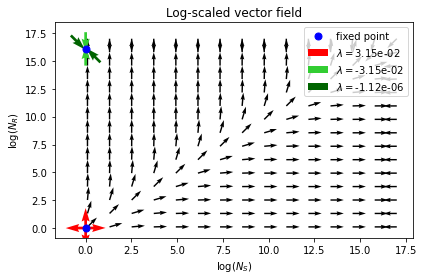

In [10]:
g = 15

xminmax, yminmax = (0.1,17), (0.1,17)
X, Y = np.meshgrid(np.linspace(*xminmax,g),np.linspace(*yminmax,g)) # x = log(N)

U, V = np.zeros(X.shape), np.zeros(X.shape)
for i in range(g):
    for j in range(g):
        u, v = rhs_cc_no_drug_logscale([X[i][j], Y[i][j]], None)
        norm = np.linalg.norm((u, v)) # arrows are normalized for easier visualization
        U[i][j] = u/norm
        V[i][j] = v/norm

# plot vector field
fig = plt.figure(figsize=(6,4))
plt.quiver(X,Y,U,V) 

# plot P0
plt.plot([0], [0], 'b.', markersize=14, label='fixed point')
plt.quiver([0], [0], -v0[0][0], -v0[1][0], color='r', label='$\lambda=${:.2f}e-02'.format(w0[0]*10**2))
plt.quiver([0], [0], +v0[0][0], +v0[1][0], color='r')
plt.quiver([0], [0], +v0[0][1], +v0[1][1], color='r')
plt.quiver([0], [0], -v0[0][1], -v0[1][1], color='r')

# plot P1
x11, x12 = P1
loc1, loc2 = 0, np.sign(x12)*np.log(x12)
plt.plot([loc1], [loc2], 'b.', markersize=14)
plt.quiver([loc1], [loc2-1.5], v1[0][0], v1[1][0], color='limegreen', label='$\lambda=${:.2f}e-02'.format(w1[0]*10**2))
plt.quiver([loc1], [loc2+1.5], -v1[0][0], -v1[1][0], color='limegreen')
plt.quiver([loc1+v1[0][1]+0.1], [loc2+v1[1][1]-0.5], -v1[0][1], -v1[1][1], color='darkgreen', label='$\lambda=${:.2f}e-06'.format(w1[1]*10**6))
plt.quiver([loc1-v1[0][1]-0.1], [loc2-v1[1][1]+0.5], v1[0][1], v1[1][1], color='darkgreen')
plt.legend(loc='upper right')
plt.xlabel('log($N_S$)'); plt.ylabel('log($N_R$)'); plt.title('Log-scaled vector field')
plt.tight_layout()
plt.savefig('phase.png', dpi=300)